In [31]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
#import datetime
import scipy.ndimage as ndimage
from matplotlib import cm
import geopy.distance
#import matplotlib as mpl

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import leafmap
import plotly.express as px
import matplotlib as mpl
import xarray as xr
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.stats import gaussian_kde
#import pysplit

In [4]:

import os
import sys
import xarray as xr
#Repository directory: place where I put my general functions
repo_dir = 'C:\\Users\\taiwoajayi\OneDrive - University of Arizona\\Python'
#Tell Python to look through repo_dir as well when importing packages
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
import Plot_2D as Plot_2D

In [2]:
import xarray as xr
file_dir = 'C:/Users/taiwoajayi/Documents/GPCP/'

# You can change "2010" to other years (2011-2014) or read all 2010-2014 values by uncommeting below
files_2020 = np.sort(glob.glob( file_dir + '**GPCPMON*2020**.nc4' ))
# files_2010 = np.sort( glob.glob( file_dir + '*.nc' ) )
files_2020

# Open the NetCDF files using xarray and specify the engine
ds_2020 = xr.open_mfdataset(files_2020, engine='netcdf4')
#ds_2020 = xr.open_mfdataset(files_2020)
ds_2020

<xarray.Dataset>
Dimensions:                   (lon: 720, lat: 360, time: 12, bnds: 2)
Coordinates:
  * lon                       (lon) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
  * lat                       (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * time                      (time) datetime64[ns] 2020-01-01 ... 2020-12-01
Dimensions without coordinates: bnds
Data variables:
    sat_gauge_precip          (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    sat_gauge_error           (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    satellite_precip          (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    satellite_source          (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    gauge_precip              (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    probability_liquid_phase  (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    gauge_relative_weight     (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    quality_index             (time, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    time_bnds                 (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/66)
    ShortName:                      GPCPMON
    LongName:                       GPCP Precipitation Level 3 Monthly 0.5-De...
    VersionID:                      3.2
    GranuleID:                      GPCPMON_L3_202001_V3.2.nc4
    Format:                         NetCDF-4
    RangeBeginningDate:             2020-01-01
    ...                             ...
    Distribution_Size:              Approximately 7 MB per file
    Distribution_Format:            NetCDF-4
    IdentifierProductDOIAuthority:  http://dx.doi.org/
    Fees:                           None
    ProcessingLevel:                Level 3
    Institution:                    Mesoscale Atmospheric Processes Laborator...

In [25]:
print(ds_2020['satellite_precip'].shape)

(12, 360, 720)


In [26]:
mean_precip = np.mean(ds_2020['satellite_precip'][:], axis=0)
mean_precip

<xarray.DataArray 'satellite_precip' (lat: 360, lon: 720)>
dask.array<mean_agg-aggregate, shape=(360, 720), dtype=float32, chunksize=(360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

In [27]:
latitudes = mean_precip['lat']
latitudes

<xarray.DataArray 'lat' (lat: 360)>
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    long_name:    Latitude
    units:        degrees_north
    description:  Center latitude

In [28]:

# Select the data within the specified time range
selected_data = ds_2020['satellite_precip']

# Group by month and calculate the monthly zonal mean along the latitude dimension
monthly_zonal_mean = selected_data.groupby('time.month').mean(dim=['time', 'lon'])

# Get the latitude values
latitudes = monthly_zonal_mean['lat']

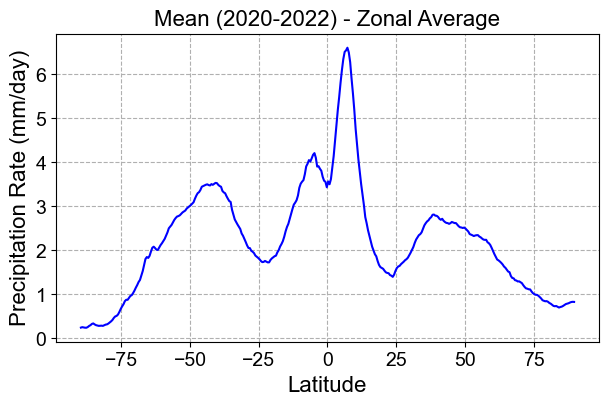

In [29]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 14


# Select the data within the specified time range
selected_data = ds_2020['satellite_precip']

# Group by month and calculate the monthly zonal mean along the latitude dimension
monthly_zonal_mean = selected_data.groupby('time.month').mean(dim=['time', 'lon'])

# Get the latitude values
latitudes = monthly_zonal_mean['lat']

# Calculate the annual zonal mean by averaging all months
annual_zonal_mean = monthly_zonal_mean.mean(dim='month')

# Plot the annual zonal mean with latitude on the x-axis
plt.figure(figsize=(7, 4))
plt.plot(latitudes, annual_zonal_mean,color='blue')

plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Precipitation Rate (mm/day)', fontsize=16)
plt.title('Mean (2020-2022) - Zonal Average', fontsize=16)
plt.grid(True, which='major',linestyle='--')
plt.show()

In [30]:

selected_data = ds_2020['satellite_precip']  # Replace with your variable name
lon = ds_2020['lon'][:]
lat = ds_2020['lat'][:]
time = ds_2020['time'][:]


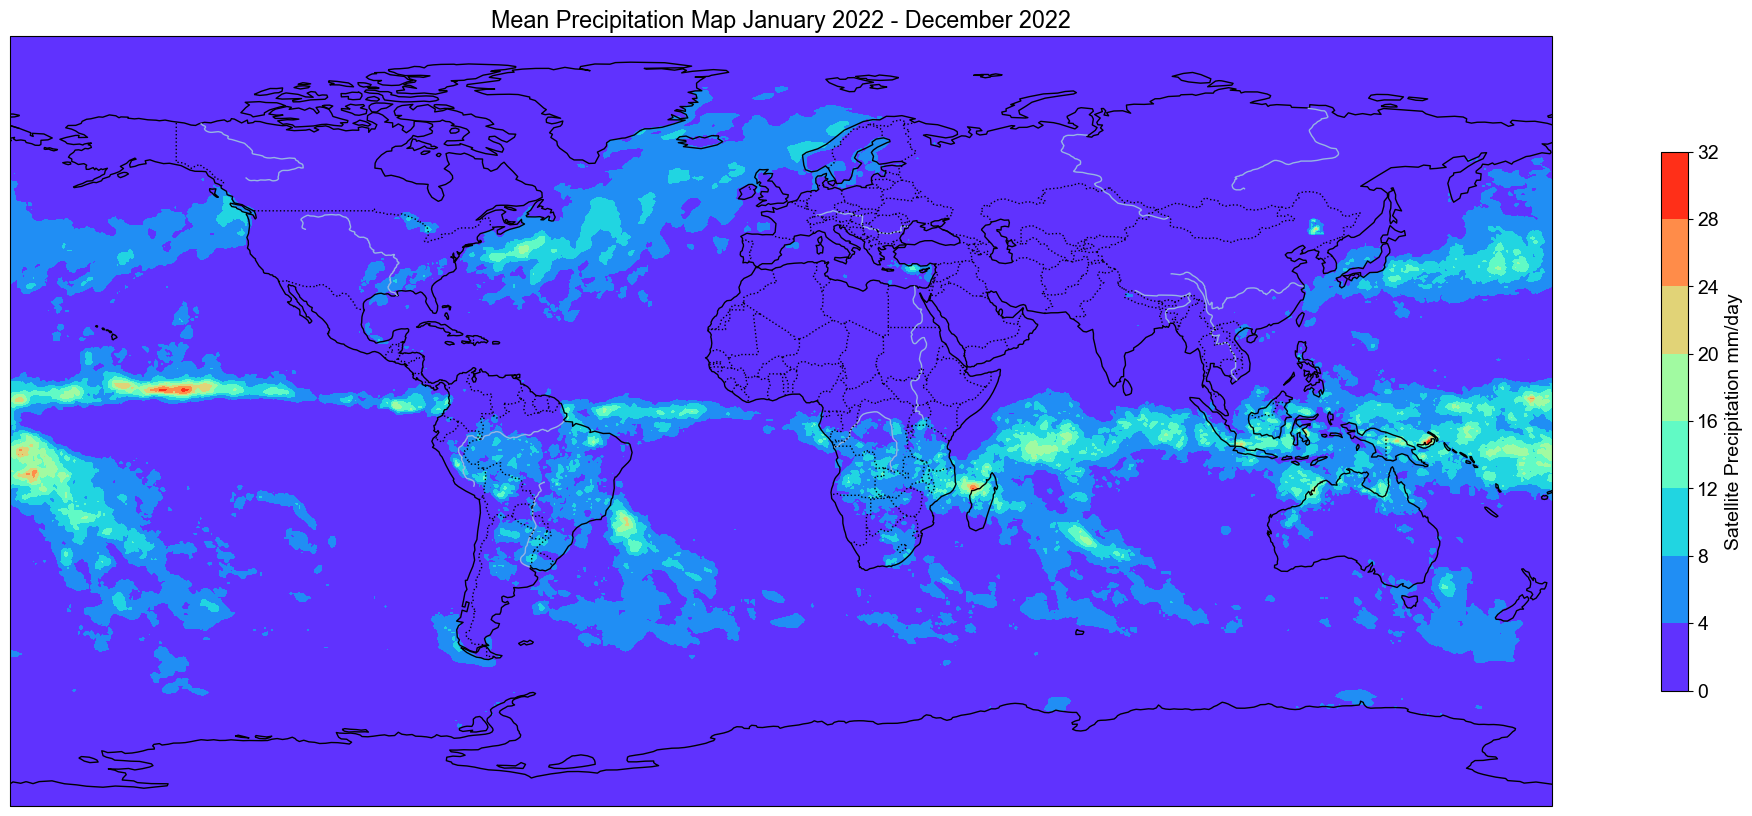

In [31]:
# Create a figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(28, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the map
c = ax.contourf(lon, lat, selected_data[0, :, :], cmap='rainbow', transform=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Add colorbar
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.7, label='Satellite Precipitation mm/day')

# Set plot title and labels
plt.title('Mean Precipitation Map January 2022 - December 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

# Don't forget to close the NetCDF4 file when you're done
ds_2020.close()


In [3]:
file_dir = 'C:/Users/taiwoajayi/Documents/GEOS/'

# List all NetCDF files in the directory
files = np.sort(glob.glob(file_dir + '**GEO*.nc'))

# Open the NetCDF files using xarray and specify the engine
ds_2019 = xr.open_mfdataset(files, engine='netcdf4', combine='nested', concat_dim='time')

# Now you can work with the 'ds' dataset, which contains data from all the NetCDF files.


In [4]:
ds_2019

<xarray.Dataset>
Dimensions:                      (time: 24, calib_dim: 8, mc_dirhed_size: 64,
                                  mc_navhed_size: 128, mc_calibhed_size: 577,
                                  grid_lat: 60, grid_lon: 90, image_y: 875,
                                  image_x: 1452, tisa_dim: 20)
Coordinates:
  * grid_lat                     (grid_lat) float32 59.5 58.5 57.5 ... 1.5 0.5
  * grid_lon                     (grid_lon) float32 -119.5 -118.5 ... -30.5
  * image_y                      (image_y) int32 1 2 3 4 5 ... 872 873 874 875
  * image_x                      (image_x) int32 1 2 3 4 ... 1449 1450 1451 1452
    latitude                     (image_y, image_x) float32 dask.array<chunksize=(875, 1452), meta=np.ndarray>
    longitude                    (image_y, image_x) float32 dask.array<chunksize=(875, 1452), meta=np.ndarray>
Dimensions without coordinates: time, calib_dim, mc_dirhed_size,
                                mc_navhed_size, mc_calibhed_size, tisa_dim
Data variables: (12/54)
    vis_063_calib                (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    vis_08_calib                 (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    vis_16_calib                 (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    vis_23_calib                 (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    temp_sir_calib               (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    temp_ir_calib                (time, calib_dim) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    ...                           ...
    visible_count_08             (time, image_y, image_x) float32 dask.array<chunksize=(1, 875, 1452), meta=np.ndarray>
    visible_count_16             (time, image_y, image_x) float32 dask.array<chunksize=(1, 875, 1452), meta=np.ndarray>
    visible_count_23             (time, image_y, image_x) float32 dask.array<chunksize=(1, 875, 1452), meta=np.ndarray>
    temperature_87               (time, image_y, image_x) float32 dask.array<chunksize=(1, 875, 1452), meta=np.ndarray>
    temperature_133              (time, image_y, image_x) float32 dask.array<chunksize=(1, 875, 1452), meta=np.ndarray>
    tisa_record                  (time, tisa_dim) float32 dask.array<chunksize=(1, 20), meta=np.ndarray>
Attributes: (12/13)
    Title:                   Pixel-level Geostationary cloud products 
    source:                  SatCORPS group, NASA Langley Research Center
    version:                 V01.2
    processed_date:           Jul 16, 2019 16:46:22 UTC
    subsat_point:            The subsatellite point for GOES-16 is located on...
    version_comment:         processed using MODIS Collection 6.1 MATCH Hourl...
    ...                      ...
    Domain_Processed:        ULC: 060.00 -120.00 LRC: 000.00 -030.00  RES:1.0...
    data_level:              c1
    VISST:                   NASA-Langley cloud and radiation products are pr...
    User_Note:               All of the datasets provided on this website are...
    NB_BB_internal_use_:     MOD:1 1 ;186 :CER;SNB:LN:n: 0.076125  0.665395  ...
    bad_scan_lines_removed:  Inspected and no bad scan lines detected

In [55]:
'''import xarray as xr
file_dir = 'C:/Users/taiwoajayi/Documents/GEOS/'

# You can change "2010" to other years (2011-2014) or read all 2010-2014 values by uncommeting below
files_2019 = np.sort(glob.glob( file_dir + '**GEO*2019**.nc' ))
# files_2010 = np.sort( glob.glob( file_dir + '*.nc' ) )
files_2019
#"C:\Users\taiwoajayi\Documents\GEOS\CER_GEO_Ed4_GOE16_NH_V01.2_2019.140.0530.06K.nc"
# Open the NetCDF files using xarray and specify the engine
ds_2019 = xr.open_mfdataset(files_2020, engine='netcdf4', combine='nested', concat_dim='lon')
#ds_2019 = xr.open_mfdataset(files_2019, engine='netcdf4')
#ds_2020 = xr.open_mfdataset(files_2020)
ds_2019'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 307-308: truncated \UXXXXXXXX escape (790573833.py, line 13)

In [82]:
# Specify the path to your NetCDF4 file
file_path = 'C:/Users/taiwoajayi/Downloads/CER_GEO_Ed4_GOE16_NH_V01.2_2019.245.0130.06K.nc'
#"C:\Users\taiwoajayi\Downloads\CER_GEO_Ed4_GOE16_NH_V01.2_2019.291.0730.06K.nc"
#"C:\Users\taiwoajayi\Downloads\CER_GEO_Ed4_GOE16_NH_V01.2_2019.241.0630.06K.nc"
# Open the NetCDF4 file using xarray
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:                      (calib_dim: 8, mc_dirhed_size: 64,
                                  mc_navhed_size: 128, mc_calibhed_size: 577,
                                  grid_lat: 60, grid_lon: 90, image_y: 875,
                                  image_x: 1452, tisa_dim: 20)
Coordinates:
  * grid_lat                     (grid_lat) float32 59.5 58.5 57.5 ... 1.5 0.5
  * grid_lon                     (grid_lon) float32 -119.5 -118.5 ... -30.5
  * image_y                      (image_y) int32 1 2 3 4 5 ... 872 873 874 875
  * image_x                      (image_x) int32 1 2 3 4 ... 1449 1450 1451 1452
    latitude                     (image_y, image_x) float32 ...
    longitude                    (image_y, image_x) float32 ...
Dimensions without coordinates: calib_dim, mc_dirhed_size, mc_navhed_size,
                                mc_calibhed_size, tisa_dim
Data variables: (12/54)
    vis_063_calib                (calib_dim) float32 ...
    vis_08_calib                 (calib_dim) float32 ...
    vis_16_calib                 (calib_dim) float32 ...
    vis_23_calib                 (calib_dim) float32 ...
    temp_sir_calib               (calib_dim) float32 ...
    temp_ir_calib                (calib_dim) float32 ...
    ...                           ...
    visible_count_08             (image_y, image_x) float32 ...
    visible_count_16             (image_y, image_x) float32 ...
    visible_count_23             (image_y, image_x) float32 ...
    temperature_87               (image_y, image_x) float32 ...
    temperature_133              (image_y, image_x) float32 ...
    tisa_record                  (tisa_dim) float32 ...
Attributes: (12/13)
    Title:                   Pixel-level Geostationary cloud products 
    source:                  SatCORPS group, NASA Langley Research Center
    version:                 V01.2
    processed_date:           Nov 16, 2019 18:51:40 UTC
    subsat_point:            The subsatellite point for GOES-16 is located on...
    version_comment:         processed using MODIS Collection 6.1 MATCH Hourl...
    ...                      ...
    Domain_Processed:        ULC: 060.00 -120.00 LRC: 000.00 -030.00  RES:1.0...
    data_level:              c1
    VISST:                   NASA-Langley cloud and radiation products are pr...
    User_Note:               All of the datasets provided on this website are...
    NB_BB_internal_use_:     MOD:1 1 ;186 :CER;SNB:LN:n: 0.079114  0.558306  ...
    bad_scan_lines_removed:  Inspected and no bad scan lines detected

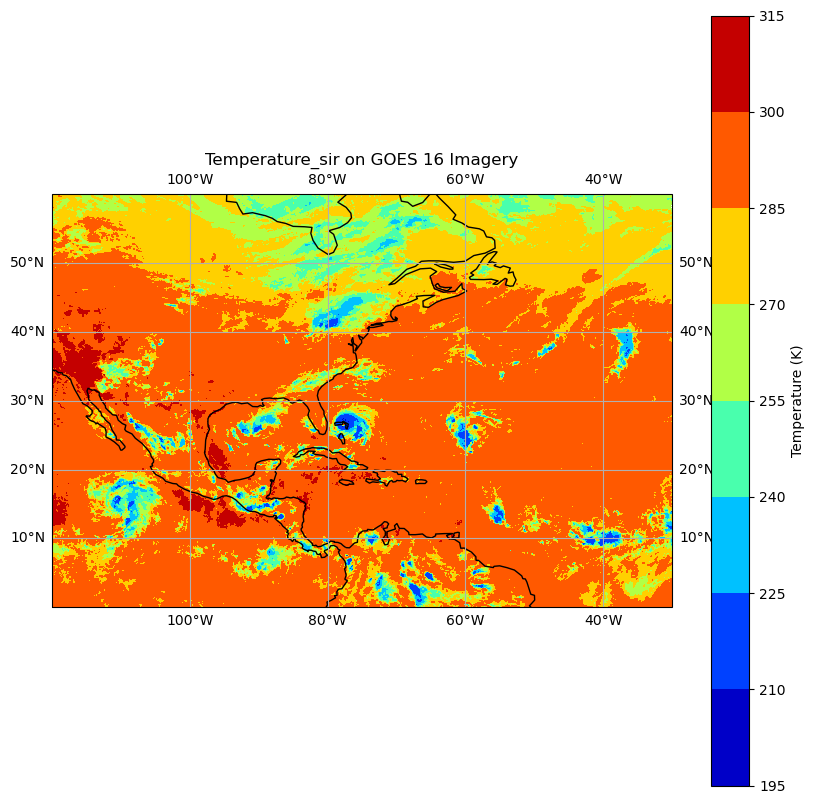

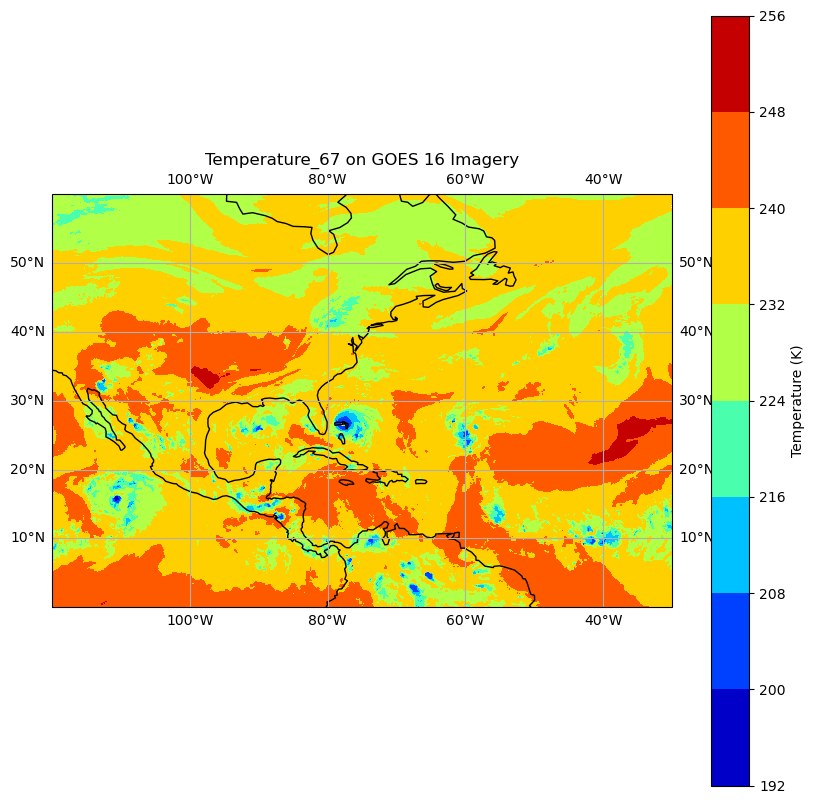

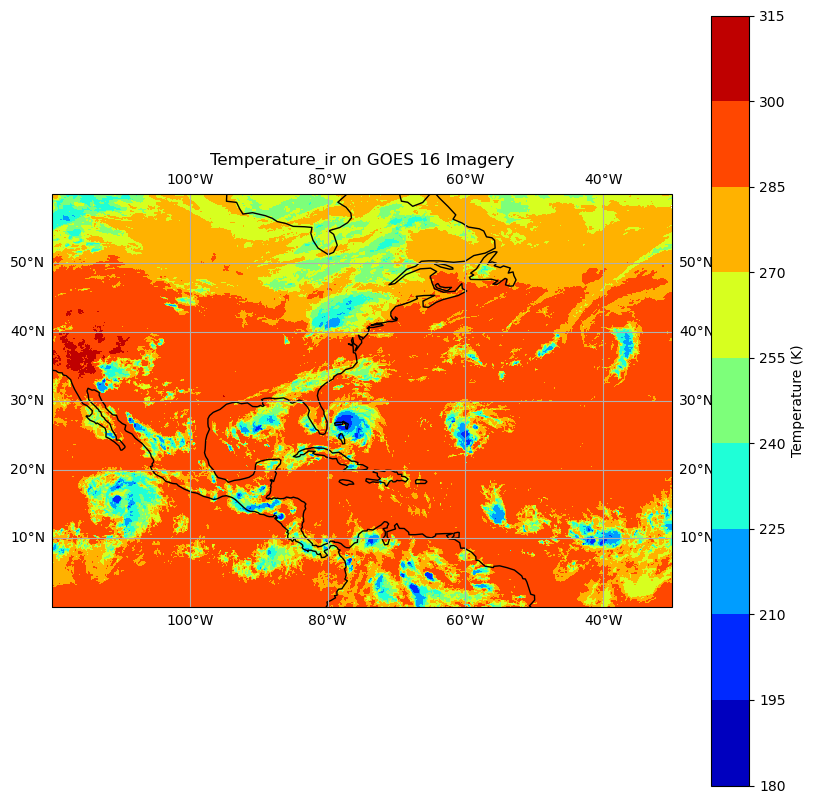

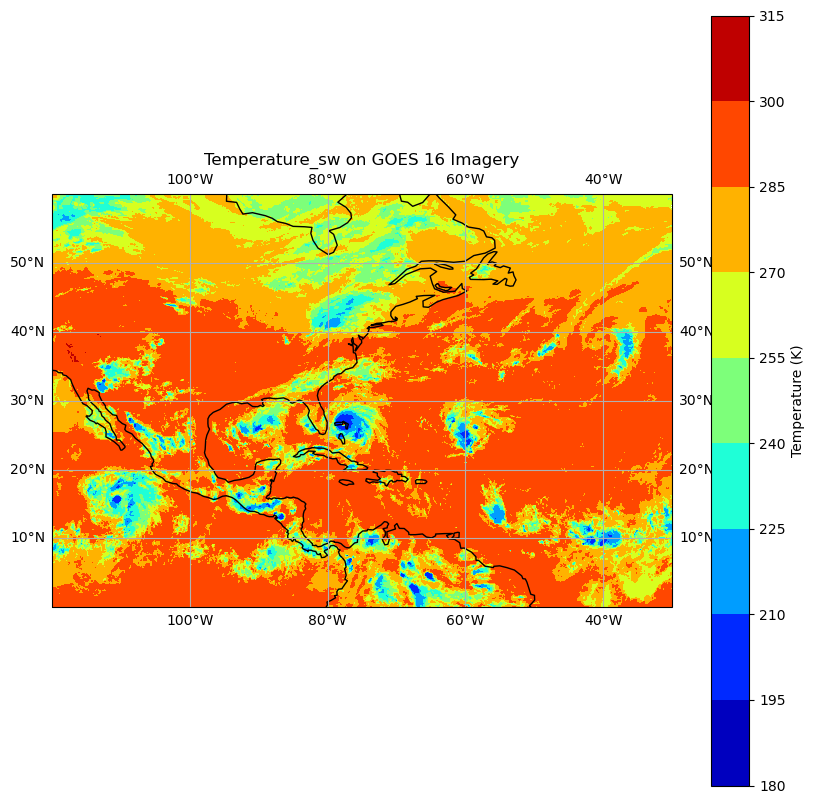

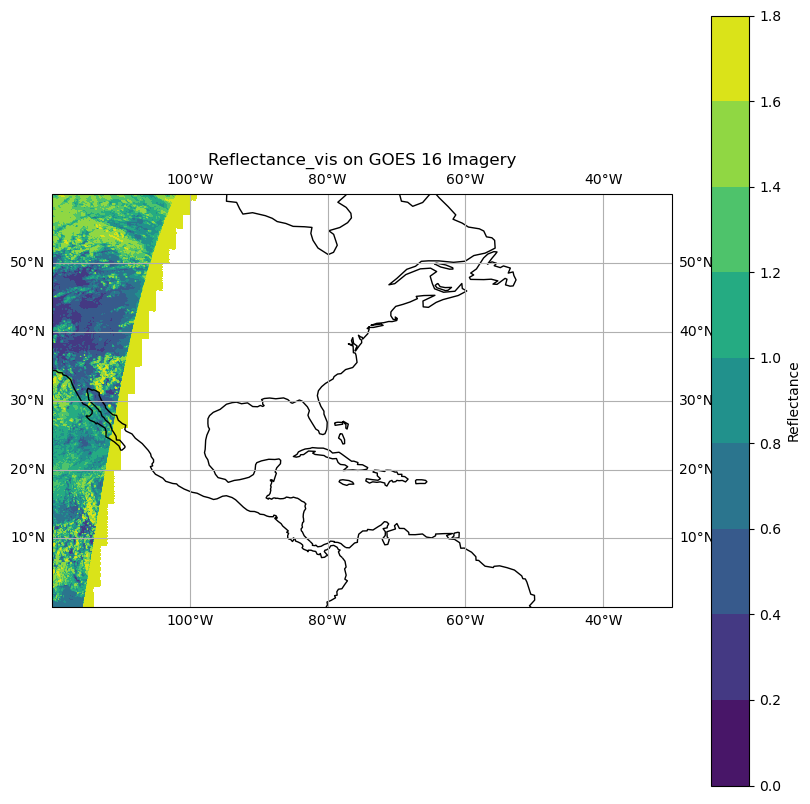

In [83]:

# Extract the desired variables
T_39 = ds['temperature_sir']
T_67 = ds['temperature_67']
T_11 = ds['temperature_ir']
T_sw = ds['temperature_sw']
VIS_8 = ds['reflectance_vis']

# Extract latitude and longitude information
latitude = ds['latitude']
longitude = ds['longitude']

# Create a function to plot a variable on a map
def plot_variable_on_map(data, title, cmap, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the extent using latitude and longitude
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())

    # Plot the variable on the map
    plt.contourf(longitude, latitude, data, cmap=cmap, transform=ccrs.PlateCarree())
    plt.colorbar(label=label)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')

    # Show the plot
    plt.show()

# Plot each variable on individual maps
plot_variable_on_map(T_39, 'Temperature_sir on GOES 16 Imagery', 'jet', 'Temperature (K)')
plot_variable_on_map(T_67, 'Temperature_67 on GOES 16 Imagery', 'jet', 'Temperature (K)')
plot_variable_on_map(T_11, 'Temperature_ir on GOES 16 Imagery', 'jet', 'Temperature (K)')
plot_variable_on_map(T_sw, 'Temperature_sw on GOES 16 Imagery', 'jet', 'Temperature (K)')
plot_variable_on_map(VIS_8, 'Reflectance_vis on GOES 16 Imagery', 'viridis', 'Reflectance')


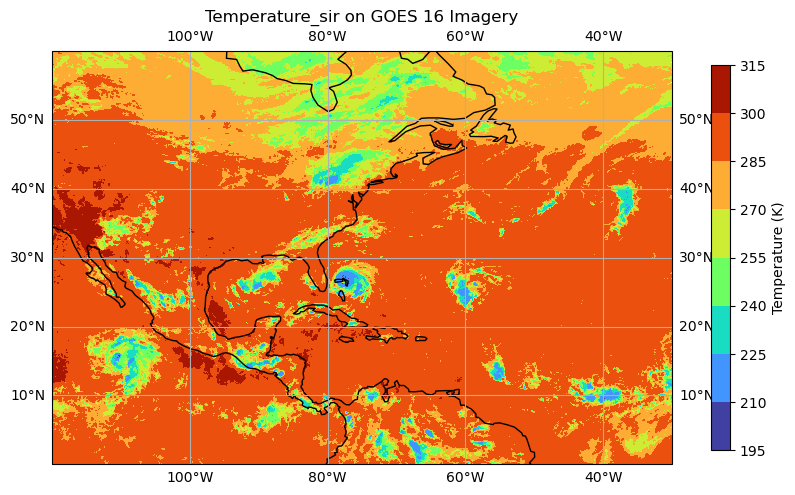

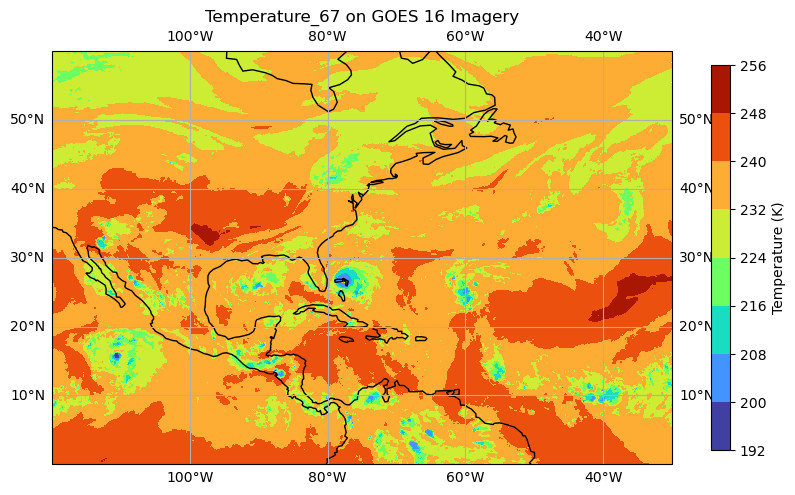

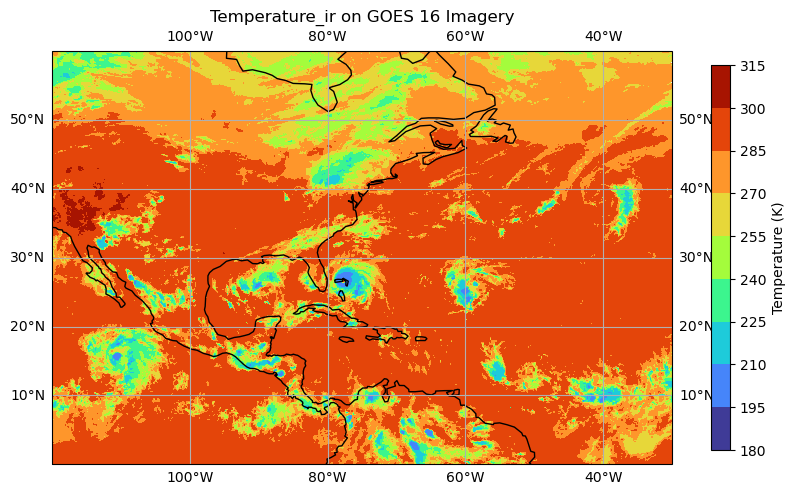

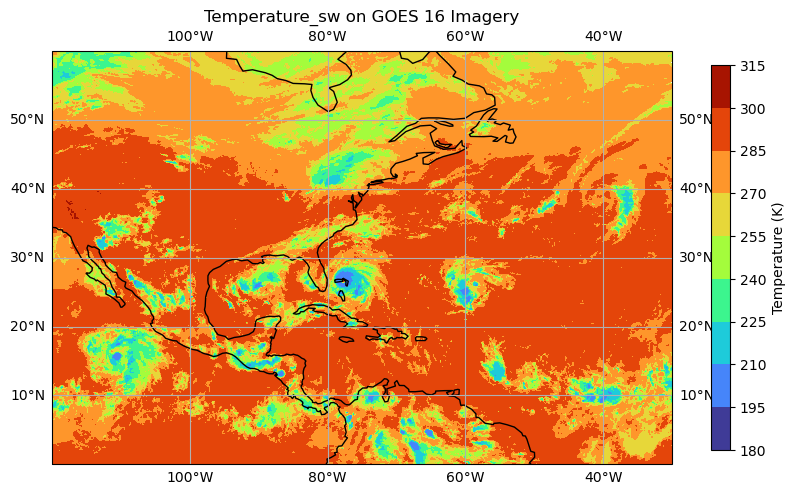

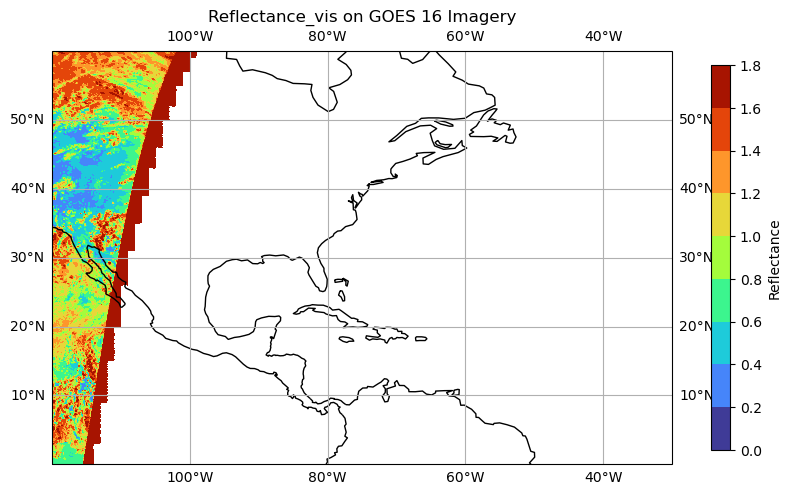

In [84]:
# Extract the desired variables
T_39 = ds['temperature_sir']
T_67 = ds['temperature_67']
T_11 = ds['temperature_ir']
T_sw = ds['temperature_sw']
VIS_8 = ds['reflectance_vis']

# Extract latitude and longitude information
latitude = ds['latitude']
longitude = ds['longitude']

# Create a function to plot a variable on a map
def plot_variable_on_map(data, title, cmap, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the extent using latitude and longitude
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())

    # Plot the variable on the map
    plt.contourf(longitude, latitude, data, cmap=cmap, transform=ccrs.PlateCarree())
    
    # Create the colorbar with adjusted padding and size
    cbar = plt.colorbar(label=label, pad=0.05, shrink=0.5)
    
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')

    # Show the plot
    plt.show()

# Plot each variable on individual maps using the "turbo" colormap
plot_variable_on_map(T_39, 'Temperature_sir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_67, 'Temperature_67 on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_11, 'Temperature_ir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_sw, 'Temperature_sw on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(VIS_8, 'Reflectance_vis on GOES 16 Imagery', 'turbo', 'Reflectance')


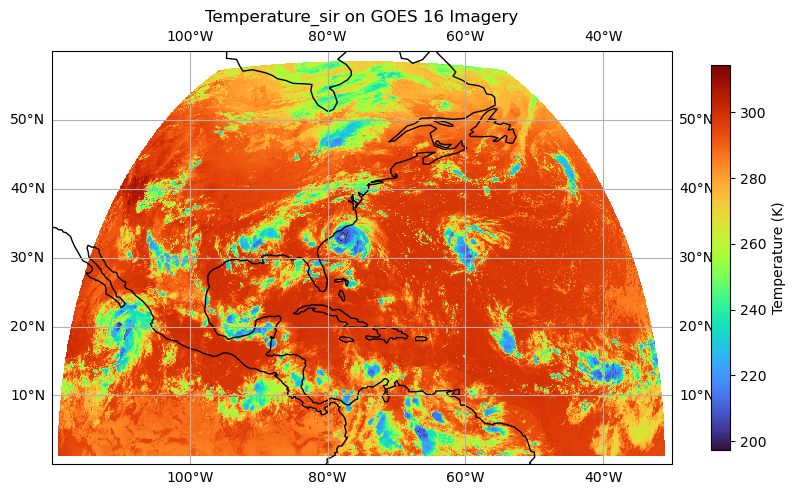

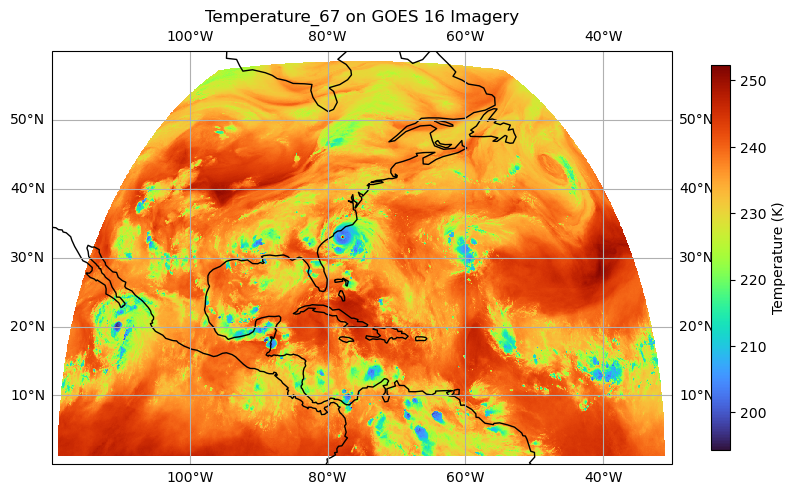

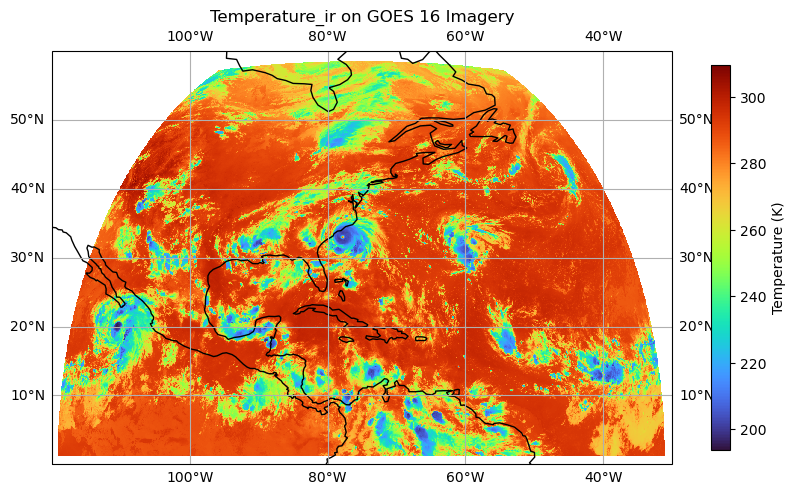

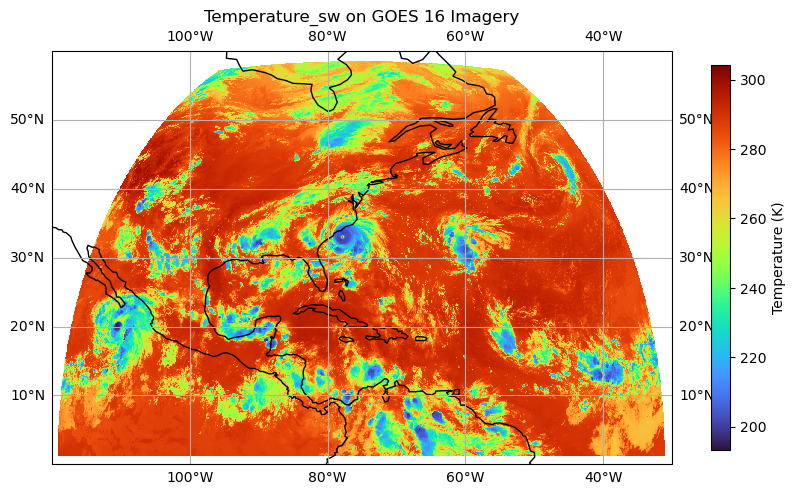

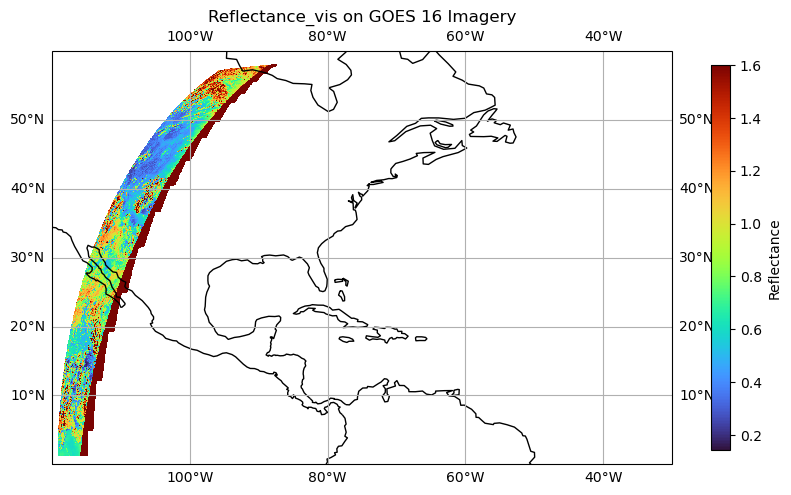

In [85]:

# Extract the desired variables
T_39 = ds['temperature_sir']
T_67 = ds['temperature_67']
T_11 = ds['temperature_ir']
T_sw = ds['temperature_sw']
VIS_8 = ds['reflectance_vis']

# Extract latitude and longitude information
latitude = ds['latitude']
longitude = ds['longitude']

# Create a function to plot a variable on a map
def plot_variable_on_map(data, title, cmap, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the extent using latitude and longitude
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())

    # Plot the variable on the map using imshow
    plt.imshow(data, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap=cmap,
               transform=ccrs.PlateCarree(), origin='upper', interpolation='none')

    # Create the colorbar with adjusted padding and size
    cbar = plt.colorbar(label=label, pad=0.05, shrink=0.5)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')

    # Show the plot
    plt.show()

# Plot each variable on individual maps using the "turbo" colormap
plot_variable_on_map(T_39, 'Temperature_sir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_67, 'Temperature_67 on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_11, 'Temperature_ir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_sw, 'Temperature_sw on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(VIS_8, 'Reflectance_vis on GOES 16 Imagery', 'turbo', 'Reflectance')


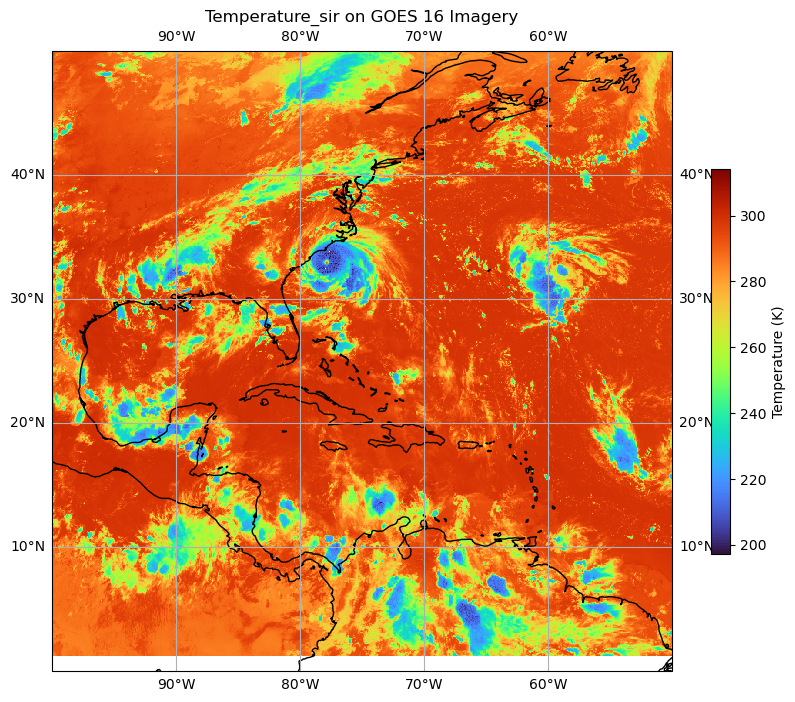

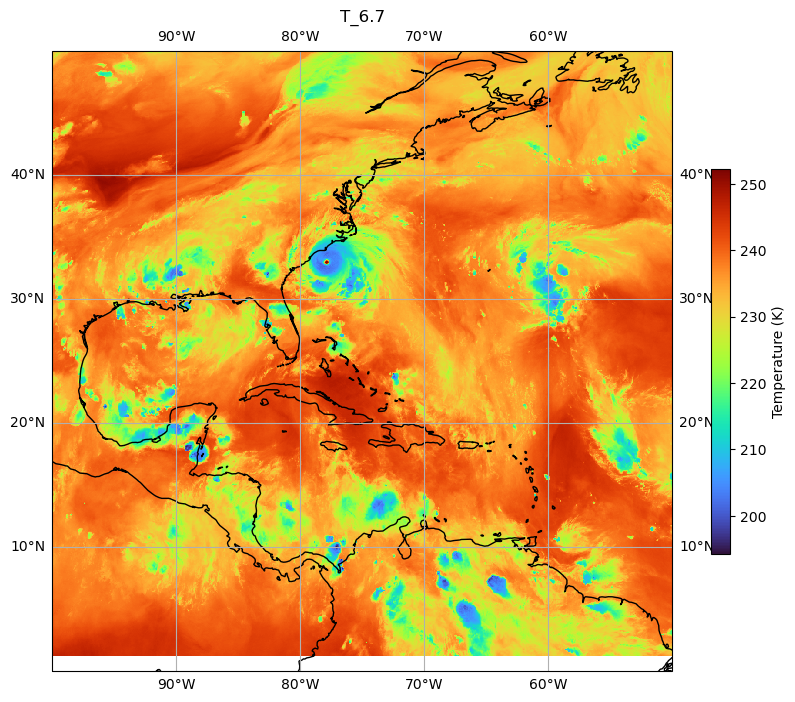

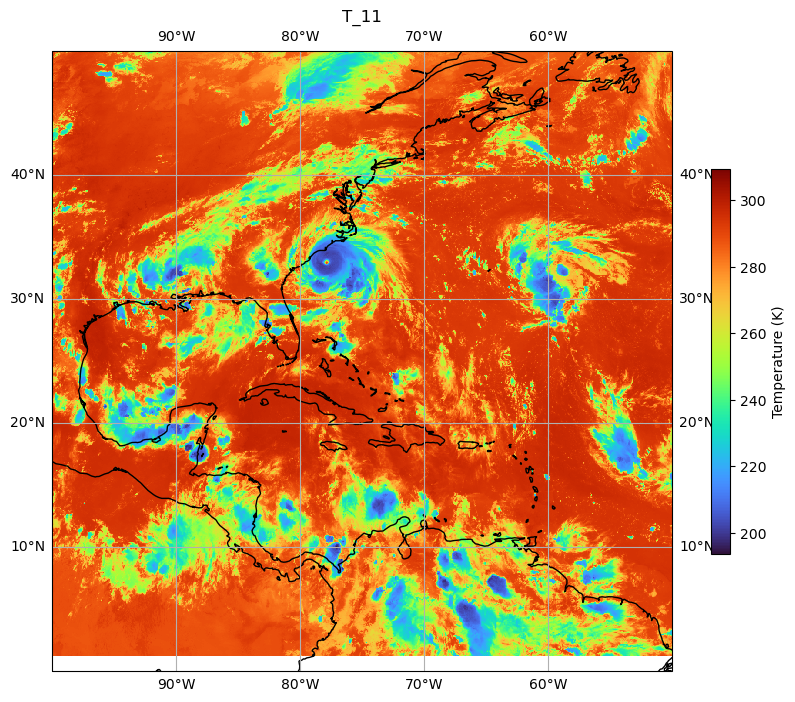

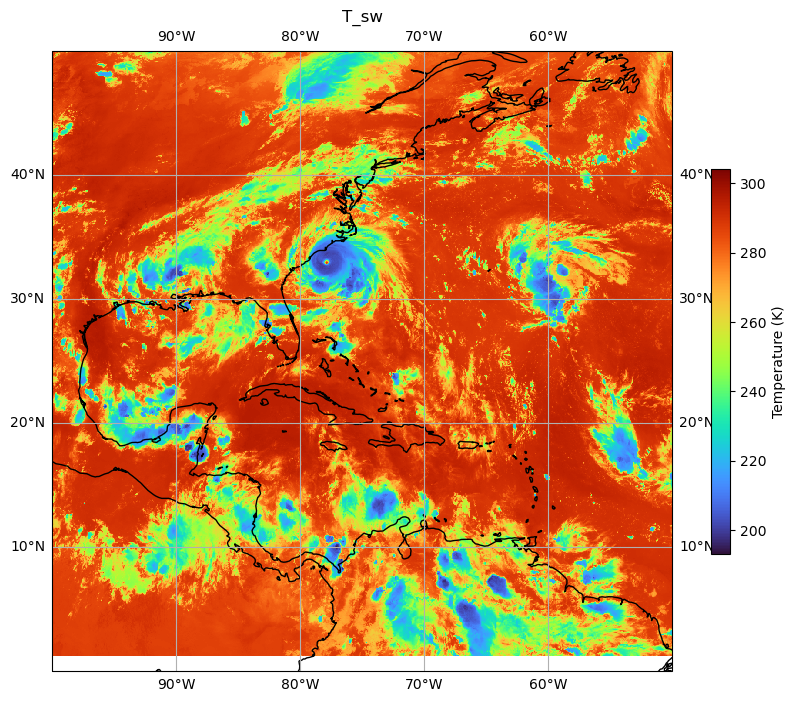

In [86]:

# Extract the desired variables
T_39 = ds['temperature_sir']
T_67 = ds['temperature_67']
T_11 = ds['temperature_ir']
T_sw = ds['temperature_sw']
VIS_8 = ds['reflectance_vis']

# Extract latitude and longitude information
latitude = ds['latitude']
longitude = ds['longitude']

# Create a function to plot a variable on a map
def plot_variable_on_map(data, title, cmap, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the extent using latitude and longitude
    ax.set_extent([-100, -50, 0, 50], crs=ccrs.PlateCarree())

    # Plot the variable on the map using imshow
    plt.imshow(data, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap=cmap,
               transform=ccrs.PlateCarree(), origin='upper', interpolation='none')

    # Create the colorbar with adjusted padding and size
    cbar = plt.colorbar(label=label, pad=0.05, shrink=0.5)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')

    # Show the plot
    plt.show()

# Plot each variable on individual maps using the "turbo" colormap
plot_variable_on_map(T_39, 'Temperature_sir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_67, 'T_6.7', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_11, 'T_11', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_sw, 'T_sw', 'turbo', 'Temperature (K)')
#plot_variable_on_map(VIS_8, 'Reflectance_vis on GOES 16 Imagery', 'turbo', 'Reflectance')


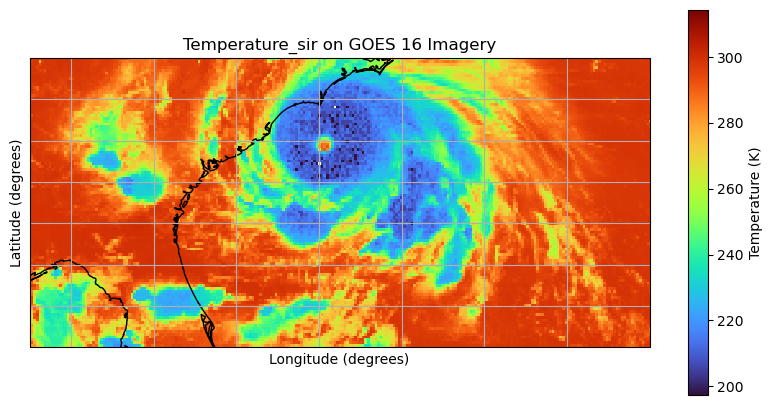

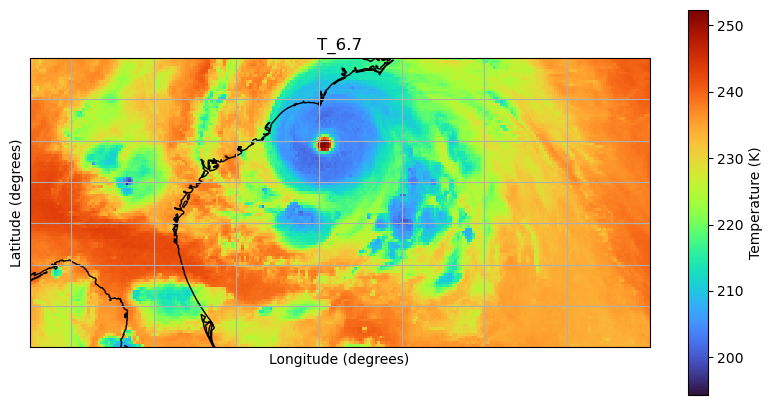

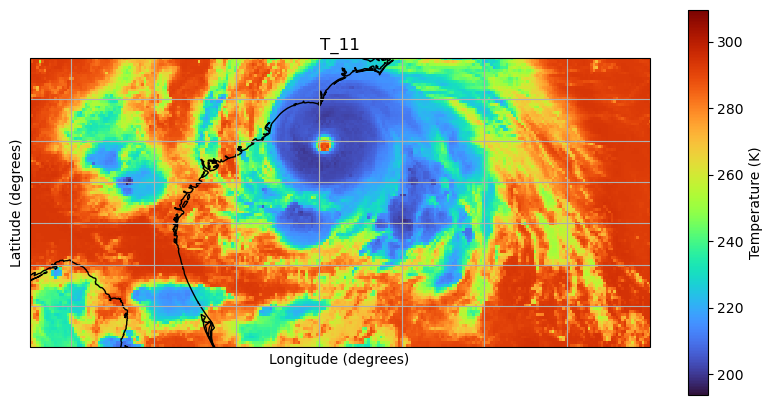

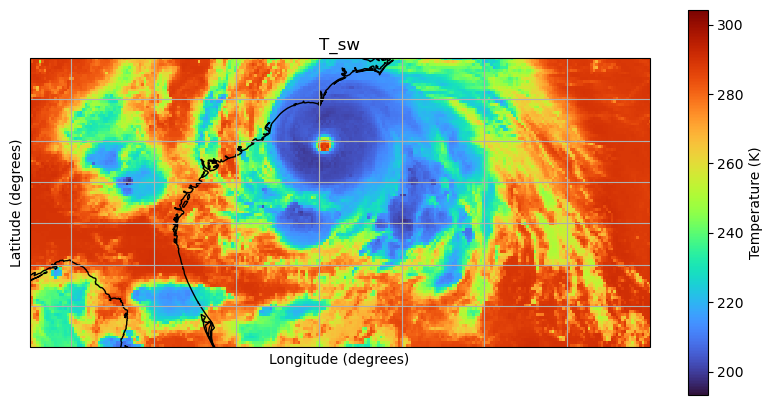

In [92]:
# Extract the desired variables
T_39 = ds['temperature_sir']
T_67 = ds['temperature_67']
T_11 = ds['temperature_ir']
T_sw = ds['temperature_sw']
VIS_8 = ds['reflectance_vis']

# Extract latitude and longitude information
latitude = ds['latitude']
longitude = ds['longitude']

# Create a function to plot a variable on a map
def plot_variable_on_map(data, title, cmap, label):
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the extent using latitude and longitude
    ax.set_extent([-85, -70, 28, 35], crs=ccrs.PlateCarree())

    # Plot the variable on the map using imshow
    plt.imshow(data, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap=cmap,
               transform=ccrs.PlateCarree(), origin='upper', interpolation='none')

    # Create the colorbar with adjusted padding and size
    cbar = plt.colorbar(label=label, pad=0.05, shrink=0.5)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=False)

    # Remove tick labels on the right-hand side and the top
    ax.set_xticks([], crs=ccrs.PlateCarree())
    ax.set_yticks([], crs=ccrs.PlateCarree())

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Longitude (degrees)')
    plt.ylabel('Latitude (degrees)')

    # Show the plot
    plt.show()

# Plot each variable on individual maps using the "turbo" colormap
plot_variable_on_map(T_39, 'Temperature_sir on GOES 16 Imagery', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_67, 'T_6.7', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_11, 'T_11', 'turbo', 'Temperature (K)')
plot_variable_on_map(T_sw, 'T_sw', 'turbo', 'Temperature (K)')
#plot_variable_on_map(VIS_8, 'Reflectance_vis on GOES 16 Imagery', 'turbo', 'Reflectance')
